In [4]:
!pip install selenium pandas 


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
# ==============================================
# 🚀 一键配置 Selenium 环境并测试运行（for Jupyter）
# ==============================================

import sys
import subprocess

def install(package):
    """Install a Python package silently"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

print("🔧 正在安装依赖包 selenium 与 webdriver-manager ...")
install("selenium")
install("webdriver-manager")

# -----------------------------
# ✅ 测试启动 Selenium（无头模式）
# -----------------------------
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

print("🌐 启动 Chrome 浏览器（无头模式）...")

options = Options()
options.add_argument("--headless")  # 无头模式，不弹出窗口
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# 创建浏览器实例
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 打开测试网页
test_url = "https://www.python.org"
driver.get(test_url)

print(f"✅ 页面标题: {driver.title}")
print(f"✅ 当前网址: {driver.current_url}")

driver.quit()
print("🎉 Selenium 配置成功，可在 Jupyter Notebook 使用！")


🔧 正在安装依赖包 selenium 与 webdriver-manager ...
🌐 启动 Chrome 浏览器（无头模式）...
✅ 页面标题: Welcome to Python.org
✅ 当前网址: https://www.python.org/
🎉 Selenium 配置成功，可在 Jupyter Notebook 使用！


In [11]:
import re
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# 启动 Chrome 浏览器
print("正在启动 Chrome 浏览器...")
driver = webdriver.Chrome()
data = []

print("开始爬取北京-海淀-西三旗房源数据...\n")

# 爬取前 20 页
for page in range(1, 21):
    if page == 1:
        url = "https://esf.fang.com/house-a015277-b02314/i31/"
    else:
        url = f"https://esf.fang.com/house-a015277-b02314/i3{page}-/"
    
    print(f"正在爬取第 {page} 页：{url}")
    driver.get(url)
    time.sleep(2)

    houses = driver.find_elements(By.CSS_SELECTOR, "div.shop_list dl")
    print(f"找到 {len(houses)} 个房源条目，开始解析...")

    count_page = 0
    for house in houses:
        try:
            # 面积
            area_text = house.find_element(By.CLASS_NAME, "tel_shop").text
            area = float(re.search(r'(\d+\.?\d*)㎡', area_text).group(1))

            # 价格（总价与单价）
            price_spans = house.find_element(By.CLASS_NAME, "price_right").find_elements(By.TAG_NAME, "span")
            total_price = float(re.search(r'(\d+\.?\d*)', price_spans[0].text).group(1))
            unit_price = float(re.search(r'(\d+\.?\d*)', price_spans[1].text).group(1))

            data.append([area, total_price, unit_price])
            count_page += 1
        except Exception:
            continue

    print(f"第 {page} 页解析完成，成功提取 {count_page} 条房源数据。\n")
    time.sleep(1)

# 数据汇总
df = pd.DataFrame(data, columns=['面积（㎡）', '总价（万元）', '单价（万元/㎡）'])
print(f"总共成功爬取 {len(df)} 条房源数据。")

# 保存文件
output_path = r"D:\A-class\data1013\xisanqi_esf.xlsx"
df.to_excel(output_path, index=False)
print(f"\n✅ 数据已成功保存到：{output_path}")

# 关闭浏览器
driver.quit()
print("爬取任务完成，浏览器已关闭。")


正在启动 Chrome 浏览器...
开始爬取北京-海淀-西三旗房源数据...

正在爬取第 1 页：https://esf.fang.com/house-a015277-b02314/i31/
找到 60 个房源条目，开始解析...
第 1 页解析完成，成功提取 60 条房源数据。

正在爬取第 2 页：https://esf.fang.com/house-a015277-b02314/i32-/
找到 60 个房源条目，开始解析...
第 2 页解析完成，成功提取 60 条房源数据。

正在爬取第 3 页：https://esf.fang.com/house-a015277-b02314/i33-/
找到 60 个房源条目，开始解析...
第 3 页解析完成，成功提取 60 条房源数据。

正在爬取第 4 页：https://esf.fang.com/house-a015277-b02314/i34-/
找到 60 个房源条目，开始解析...
第 4 页解析完成，成功提取 60 条房源数据。

正在爬取第 5 页：https://esf.fang.com/house-a015277-b02314/i35-/
找到 60 个房源条目，开始解析...
第 5 页解析完成，成功提取 60 条房源数据。

正在爬取第 6 页：https://esf.fang.com/house-a015277-b02314/i36-/
找到 60 个房源条目，开始解析...
第 6 页解析完成，成功提取 60 条房源数据。

正在爬取第 7 页：https://esf.fang.com/house-a015277-b02314/i37-/
找到 60 个房源条目，开始解析...
第 7 页解析完成，成功提取 60 条房源数据。

正在爬取第 8 页：https://esf.fang.com/house-a015277-b02314/i38-/
找到 60 个房源条目，开始解析...
第 8 页解析完成，成功提取 60 条房源数据。

正在爬取第 9 页：https://esf.fang.com/house-a015277-b02314/i39-/
找到 60 个房源条目，开始解析...
第 9 页解析完成，成功提取 60 条房源数据。

正在爬取第 10 页：https://esf.f

In [12]:
import re
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

print("正在启动 Chrome 浏览器...")
driver = webdriver.Chrome()
data = []

print("开始爬取北京-海淀-西三旗租房数据...\n")

# 最多爬取 20 页
for page in range(1, 21):
    if page == 1:
        url = "https://zu.fang.com/house-a015277-b02314/"
    else:
        url = f"https://zu.fang.com/house-a015277-b02314/i3{page}/"

    print(f"正在爬取第 {page} 页：{url}")
    driver.get(url)
    time.sleep(2)

    # 找到所有房源条目
    houses = driver.find_elements(By.CSS_SELECTOR, "dl.list.hiddenMap.rel")
    if not houses:
        print("未发现更多房源，提前结束。")
        break

    print(f"发现 {len(houses)} 条房源，开始提取...")

    count_page = 0
    for house in houses:
        try:
            # 提取面积信息（例如：整租 | 1室1厅 | 36㎡ | 朝南）
            info_text = house.find_element(By.CLASS_NAME, "font15").text
            area_match = re.search(r"(\d+\.?\d*)㎡", info_text)
            if not area_match:
                continue
            area = float(area_match.group(1))

            # 提取租金信息（例如：3500 元/月）
            price_text = house.find_element(By.CSS_SELECTOR, "p.mt5 span.price").text
            rent_price = float(re.search(r"(\d+\.?\d*)", price_text).group(1))

            data.append([area, rent_price])
            count_page += 1

        except Exception:
            continue

    print(f"第 {page} 页完成，成功提取 {count_page} 条数据。\n")
    time.sleep(1)

# 数据汇总
df = pd.DataFrame(data, columns=['面积（㎡）', '租金（元/月）'])
print(f"总共成功爬取 {len(df)} 条房源数据。")

# 保存 Excel 文件
output_path = r"D:\A-class\data1013\xisanqi_zu.xlsx"
df.to_excel(output_path, index=False)
print(f"\n✅ 数据已成功保存到：{output_path}")

# 关闭浏览器
driver.quit()
print("爬取任务完成，浏览器已关闭。")


正在启动 Chrome 浏览器...
开始爬取北京-海淀-西三旗租房数据...

正在爬取第 1 页：https://zu.fang.com/house-a015277-b02314/
发现 60 条房源，开始提取...
第 1 页完成，成功提取 60 条数据。

正在爬取第 2 页：https://zu.fang.com/house-a015277-b02314/i32/
发现 60 条房源，开始提取...
第 2 页完成，成功提取 60 条数据。

正在爬取第 3 页：https://zu.fang.com/house-a015277-b02314/i33/
发现 60 条房源，开始提取...
第 3 页完成，成功提取 60 条数据。

正在爬取第 4 页：https://zu.fang.com/house-a015277-b02314/i34/
发现 60 条房源，开始提取...
第 4 页完成，成功提取 60 条数据。

正在爬取第 5 页：https://zu.fang.com/house-a015277-b02314/i35/
发现 60 条房源，开始提取...
第 5 页完成，成功提取 60 条数据。

正在爬取第 6 页：https://zu.fang.com/house-a015277-b02314/i36/
发现 60 条房源，开始提取...
第 6 页完成，成功提取 60 条数据。

正在爬取第 7 页：https://zu.fang.com/house-a015277-b02314/i37/
发现 60 条房源，开始提取...
第 7 页完成，成功提取 60 条数据。

正在爬取第 8 页：https://zu.fang.com/house-a015277-b02314/i38/
发现 60 条房源，开始提取...
第 8 页完成，成功提取 60 条数据。

正在爬取第 9 页：https://zu.fang.com/house-a015277-b02314/i39/
发现 60 条房源，开始提取...
第 9 页完成，成功提取 60 条数据。

正在爬取第 10 页：https://zu.fang.com/house-a015277-b02314/i310/
发现 60 条房源，开始提取...
第 10 页完成，成功提取 60 条数据。



各地区数据特征对比：
        area_count  area_mean  area_std  area_min  area_max  total_price_mean  \
region                                                                          
上地            1200     114.52     44.09     36.69    314.71           1007.52   
清河            1200     158.59     82.84     40.23    562.00           1496.90   
西三旗           1200     108.68     56.85     37.91    638.28            667.60   
西二旗            704     120.16     59.05     36.32    371.03            852.77   

        total_price_std  total_price_min  total_price_max  unit_price_mean  \
region                                                                       
上地               409.50            245.0           2980.0         90615.89   
清河               814.72            215.0           4300.0         94274.16   
西三旗              488.29            170.0           4050.0         58478.35   
西二旗              591.42            208.0           3480.0         66795.63   

        unit_price_std  unit_pric

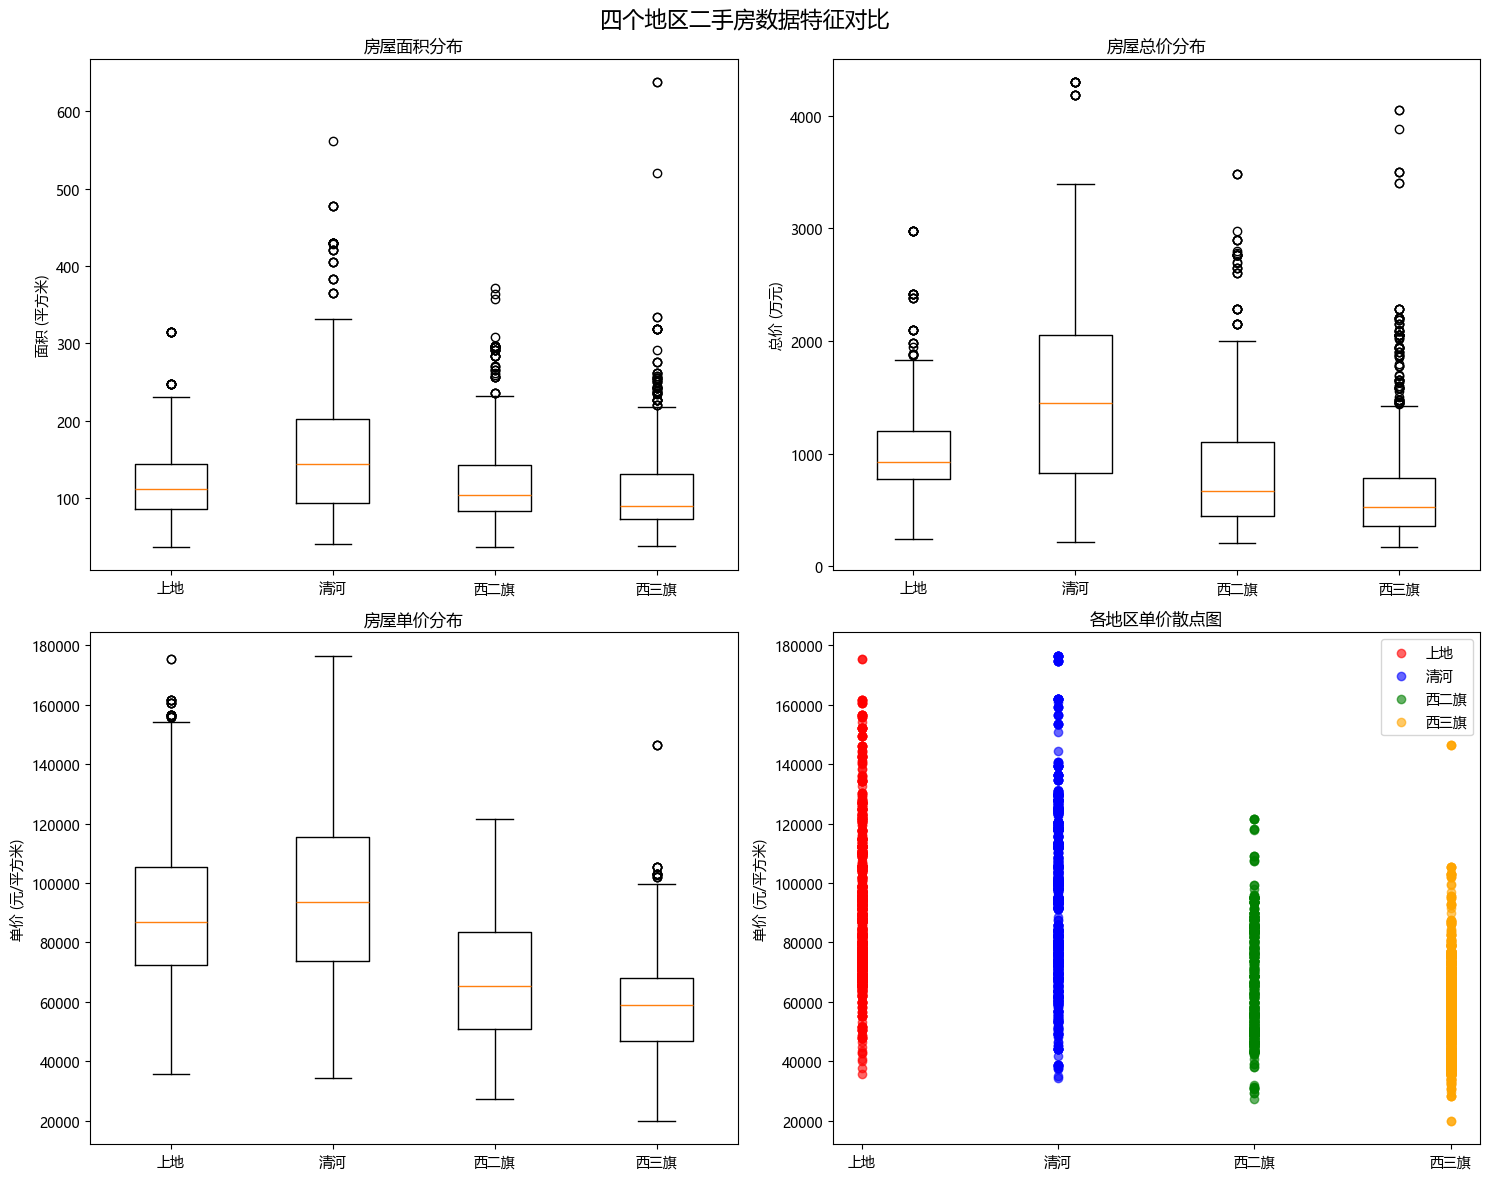

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# 解决中文显示问题
try:
    # 尝试使用微软雅黑字体
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
except:
    # 如果失败，尝试使用黑体
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

# 设置文件路径
base_path = r'D:\A-class\data1013'

# 读取四个地区的数据
df_shangdi = pd.read_excel(f'{base_path}/df_esf_Shangdi.xlsx')
df_qinghe = pd.read_excel(f'{base_path}/qinghe_esf.xlsx')
df_xierqi = pd.read_excel(f'{base_path}/xierqi_esf.xlsx')
df_xisanqi = pd.read_excel(f'{base_path}/xisanqi_esf.xlsx')

# 数据标准化处理，统一列名以便分析
# 上地数据
df_shangdi_clean = df_shangdi[['area/㎡', 'total_price/yuan', 'unit_price/(yuan/㎡)']].copy()
df_shangdi_clean.columns = ['area', 'total_price', 'unit_price']
df_shangdi_clean['area'] = df_shangdi_clean['area']  # 平方米
df_shangdi_clean['total_price'] = df_shangdi_clean['total_price'] / 10000  # 转换为万元
df_shangdi_clean['unit_price'] = df_shangdi_clean['unit_price']  # 元/平方米

# 清河数据
df_qinghe_clean = df_qinghe[['square', 'total', 'Unnamed: 3']].copy()
df_qinghe_clean.columns = ['area', 'total_price', 'unit_price']
df_qinghe_clean['area'] = df_qinghe_clean['area']  # 平方米
df_qinghe_clean['total_price'] = df_qinghe_clean['total_price']  # 万元
df_qinghe_clean['unit_price'] = df_qinghe_clean['unit_price']  # 元/平方米

# 西二旗数据
df_xierqi_clean = df_xierqi[['square', 'total', 'Unnamed: 3']].copy()
df_xierqi_clean.columns = ['area', 'total_price', 'unit_price']
df_xierqi_clean['area'] = df_xierqi_clean['area']  # 平方米
df_xierqi_clean['total_price'] = df_xierqi_clean['total_price']  # 万元
df_xierqi_clean['unit_price'] = df_xierqi_clean['unit_price']  # 元/平方米

# 西三旗数据
df_xisanqi_clean = df_xisanqi[['square', 'total', 'Unnamed: 3']].copy()
df_xisanqi_clean.columns = ['area', 'total_price', 'unit_price']
df_xisanqi_clean['area'] = df_xisanqi_clean['area']  # 平方米
df_xisanqi_clean['total_price'] = df_xisanqi_clean['total_price']  # 万元
df_xisanqi_clean['unit_price'] = df_xisanqi_clean['unit_price']  # 元/平方米

# 添加地区标识
df_shangdi_clean['region'] = '上地'
df_qinghe_clean['region'] = '清河'
df_xierqi_clean['region'] = '西二旗'
df_xisanqi_clean['region'] = '西三旗'

# 合并所有数据以便比较
all_data = pd.concat([df_shangdi_clean, df_qinghe_clean, df_xierqi_clean, df_xisanqi_clean], ignore_index=True)

# 显示各地区数据特征对比表格
print("各地区数据特征对比：")
summary_stats = all_data.groupby('region').agg({
    'area': ['count', 'mean', 'std', 'min', 'max'],
    'total_price': ['mean', 'std', 'min', 'max'],
    'unit_price': ['mean', 'std', 'min', 'max']
}).round(2)

# 重命名列索引使其更清晰
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns]
print(summary_stats)

# 定义检测异常值的函数
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 检查异常值
print("\n各地区单价异常值检测：")
for region in ['上地', '清河', '西二旗', '西三旗']:
    data_region = all_data[all_data['region'] == region]
    outliers = detect_outliers(data_region, 'unit_price')
    print(f"{region}: 发现 {len(outliers)} 个单价异常值")
    if len(outliers) > 0:
        print(f"  异常值范围: {outliers['unit_price'].min():.0f} - {outliers['unit_price'].max():.0f} 元/㎡")

# 创建可视化图表
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('四个地区二手房数据特征对比', fontsize=16)

# 1. 各地区房屋面积分布箱线图
area_data = [df_shangdi_clean['area'], df_qinghe_clean['area'], df_xierqi_clean['area'], df_xisanqi_clean['area']]
axes[0,0].boxplot(area_data, tick_labels=['上地', '清河', '西二旗', '西三旗'])  # 修复警告
axes[0,0].set_title('房屋面积分布')
axes[0,0].set_ylabel('面积 (平方米)')

# 2. 各地区总价分布箱线图
price_data = [df_shangdi_clean['total_price'], df_qinghe_clean['total_price'], df_xierqi_clean['total_price'], df_xisanqi_clean['total_price']]
axes[0,1].boxplot(price_data, tick_labels=['上地', '清河', '西二旗', '西三旗'])  # 修复警告
axes[0,1].set_title('房屋总价分布')
axes[0,1].set_ylabel('总价 (万元)')

# 3. 各地区单价分布箱线图
unit_data = [df_shangdi_clean['unit_price'], df_qinghe_clean['unit_price'], df_xierqi_clean['unit_price'], df_xisanqi_clean['unit_price']]
axes[1,0].boxplot(unit_data, tick_labels=['上地', '清河', '西二旗', '西三旗'])  # 修复警告
axes[1,0].set_title('房屋单价分布')
axes[1,0].set_ylabel('单价 (元/平方米)')

# 4. 各地区单价散点图（突出异常值）
colors = ['red', 'blue', 'green', 'orange']
for i, (region, color) in enumerate(zip(['上地', '清河', '西二旗', '西三旗'], colors)):
    data_region = all_data[all_data['region'] == region]
    axes[1,1].scatter([i+1]*len(data_region), data_region['unit_price'], alpha=0.6, color=color, label=region)

axes[1,1].set_title('各地区单价散点图')
axes[1,1].set_ylabel('单价 (元/平方米)')
axes[1,1].set_xticks([1, 2, 3, 4])
axes[1,1].set_xticklabels(['上地', '清河', '西二旗', '西三旗'])
axes[1,1].legend()

plt.tight_layout()
plt.savefig('regions_housing_data_analysis.png')
print("图表已保存为 regions_housing_data_analysis.png")

# 更详细地分析异常值
print("\n详细异常值分析：")
print("1. 上地地区单价异常值详情：")
shangdi_outliers = detect_outliers(df_shangdi_clean, 'unit_price')
if len(shangdi_outliers) > 0:
    print(f"   - 数量：{len(shangdi_outliers)} 个")
    print(f"   - 单价范围：{shangdi_outliers['unit_price'].min():.0f} - {shangdi_outliers['unit_price'].max():.0f} 元/㎡")
    print(f"   - 对应面积范围：{shangdi_outliers['area'].min():.2f} - {shangdi_outliers['area'].max():.2f} 平方米")
    print(f"   - 对应总价范围：{shangdi_outliers['total_price'].min():.0f} - {shangdi_outliers['total_price'].max():.0f} 万元")

print("\n2. 西三旗地区单价异常值详情：")
xisanqi_outliers = detect_outliers(df_xisanqi_clean, 'unit_price')
if len(xisanqi_outliers) > 0:
    print(f"   - 数量：{len(xisanqi_outliers)} 个")
    print(f"   - 单价范围：{xisanqi_outliers['unit_price'].min():.0f} - {xisanqi_outliers['unit_price'].max():.0f} 元/㎡")
    print(f"   - 对应面积范围：{xisanqi_outliers['area'].min():.2f} - {xisanqi_outliers['area'].max():.2f} 平方米")
    print(f"   - 对应总价范围：{xisanqi_outliers['total_price'].min():.0f} - {xisanqi_outliers['total_price'].max():.0f} 万元")

plt.show()

=== 数据基本信息 ===
上地数据形状: (1016, 4)
清河数据形状: (1200, 4)
西二旗数据形状: (424, 4)
西三旗数据形状: (1100, 4)

=== 数据前几行预览 ===
上地数据:
   square  total      unit  price_permonth
0     314   2.55  0.008121           25500
1     125   1.10  0.008800           11000
2     136   1.29  0.009485           12900
3     114   1.05  0.009211           10500
4     106   1.20  0.011321           12000

清河数据:
   square  total      unit  rent
0      85   0.66  0.007765  6600
1      12   0.17  0.014167  1700
2      48   0.42  0.008750  4200
3      18   0.20  0.011111  2000
4      12   0.18  0.015000  1800

西二旗数据:
   square  total      unit  Unnamed: 3
0      18   0.23  0.012778        2300
1      16   0.21  0.013125        2100
2     122   1.20  0.009836       12000
3     122   1.20  0.009836       12000
4     233   2.80  0.012017       28000

西三旗数据:
   square  total      unit  租金（元/月）
0      36   0.35  0.009722     3500
1      34   0.30  0.008824     3000
2      25   0.32  0.012800     3200
3      41   0.35  0.008537     3

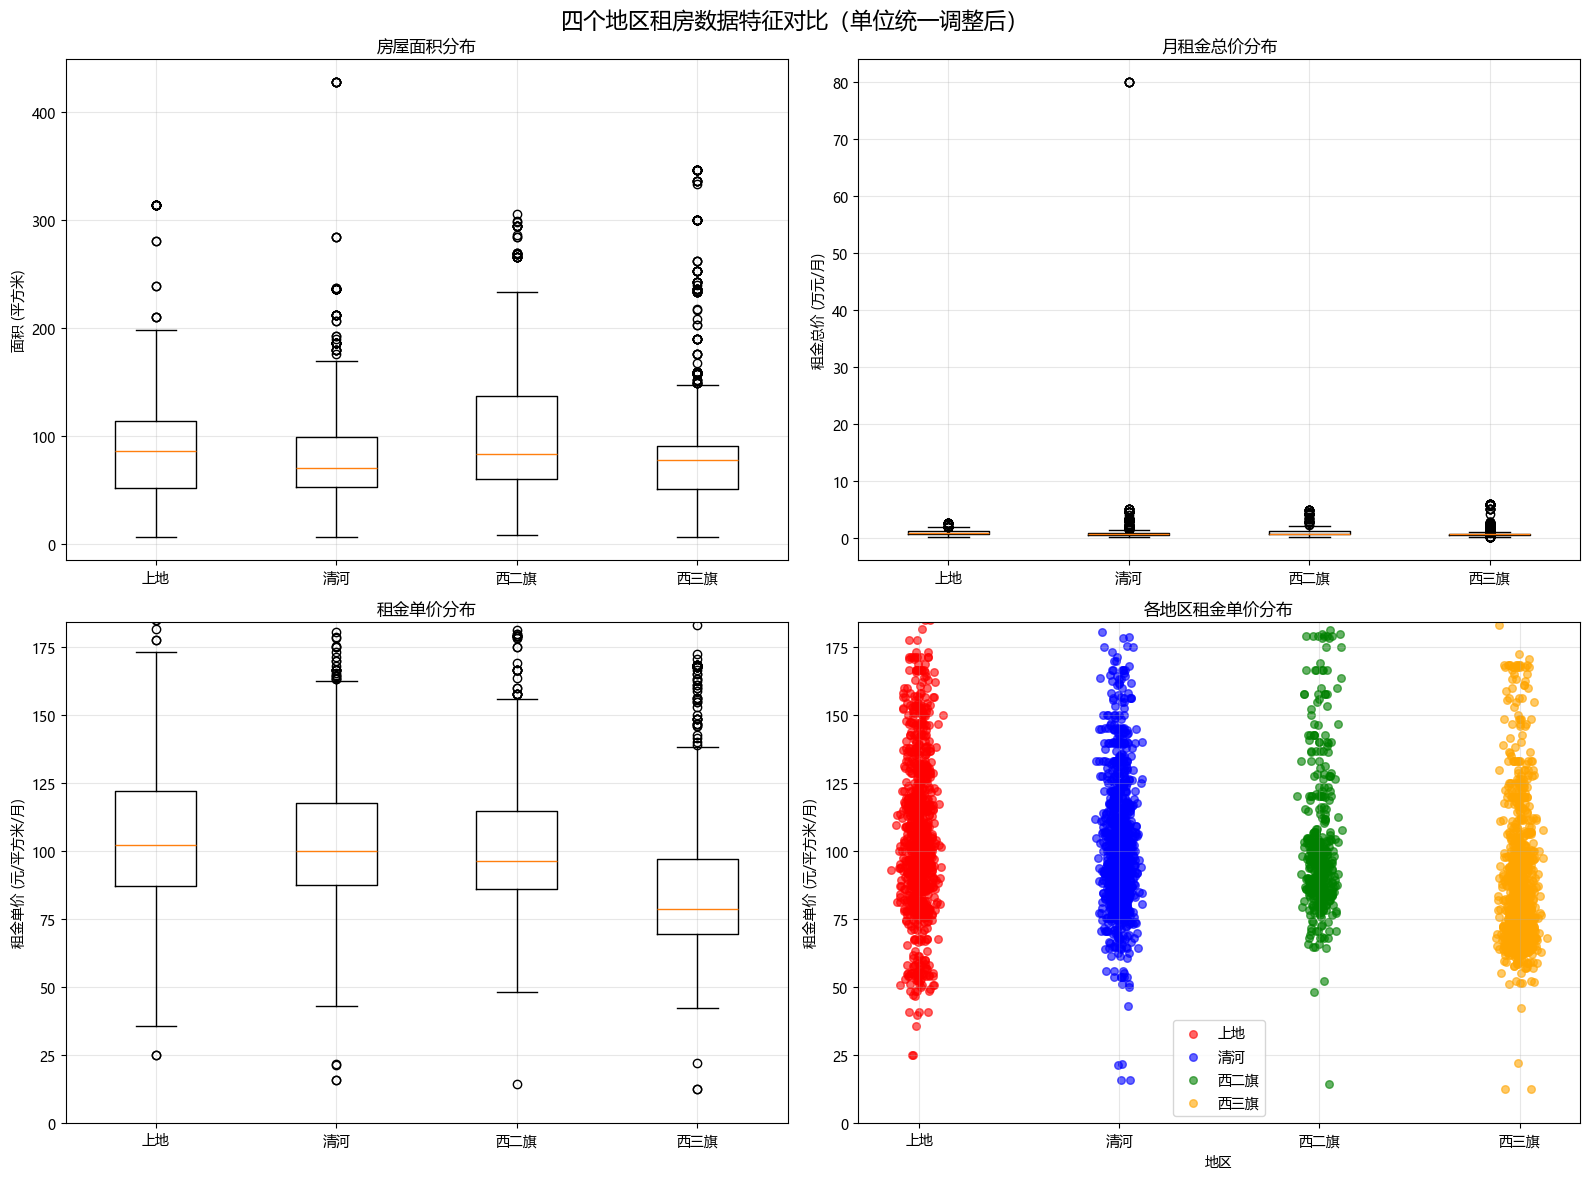

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# 解决中文显示问题
try:
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
except:
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

# 设置文件路径
base_path = r'D:\A-class\data1013'

# 读取四个地区的租房数据
df_shangdi = pd.read_excel(f'{base_path}/df_rent_Shangdi.xlsx')
df_qinghe = pd.read_excel(f'{base_path}/qinghe_zu.xlsx')
df_xierqi = pd.read_excel(f'{base_path}/xierqi_zu.xlsx')
df_xisanqi = pd.read_excel(f'{base_path}/xisanqi_zu.xlsx')

# 打印各数据框的基本信息用于调试
print("=== 数据基本信息 ===")
print("上地数据形状:", df_shangdi.shape)
print("清河数据形状:", df_qinghe.shape)
print("西二旗数据形状:", df_xierqi.shape)
print("西三旗数据形状:", df_xisanqi.shape)

print("\n=== 数据前几行预览 ===")
print("上地数据:")
print(df_shangdi.head())
print("\n清河数据:")
print(df_qinghe.head())
print("\n西二旗数据:")
print(df_xierqi.head())
print("\n西三旗数据:")
print(df_xisanqi.head())

# 数据标准化处理，统一单位
# 上地数据 - 假设单价已经是元/㎡/月
df_shangdi_clean = df_shangdi.iloc[:, [0, 1, 2]].copy()
df_shangdi_clean.columns = ['area', 'total_price', 'unit_price']
df_shangdi_clean['area'] = df_shangdi_clean['area']
df_shangdi_clean['total_price'] = df_shangdi_clean['total_price'] * 10000  # 万元→元
df_shangdi_clean['unit_price'] = df_shangdi_clean['unit_price'] * 10000  # 万元→元

# 清河、西二旗、西三旗数据 - 假设单价是万元/㎡/月，需要转换为元/㎡/月
df_qinghe_clean = df_qinghe.iloc[:, [0, 1, 2]].copy()
df_qinghe_clean.columns = ['area', 'total_price', 'unit_price']
df_qinghe_clean['area'] = df_qinghe_clean['area']
df_qinghe_clean['total_price'] = df_qinghe_clean['total_price'] * 10000  # 万元→元
df_qinghe_clean['unit_price'] = df_qinghe_clean['unit_price'] * 10000  # 万元→元

df_xierqi_clean = df_xierqi.iloc[:, [0, 1, 2]].copy()
df_xierqi_clean.columns = ['area', 'total_price', 'unit_price']
df_xierqi_clean['area'] = df_xierqi_clean['area']
df_xierqi_clean['total_price'] = df_xierqi_clean['total_price'] * 10000  # 万元→元
df_xierqi_clean['unit_price'] = df_xierqi_clean['unit_price'] * 10000  # 万元→元

df_xisanqi_clean = df_xisanqi.iloc[:, [0, 1, 2]].copy()
df_xisanqi_clean.columns = ['area', 'total_price', 'unit_price']
df_xisanqi_clean['area'] = df_xisanqi_clean['area']
df_xisanqi_clean['total_price'] = df_xisanqi_clean['total_price'] * 10000  # 万元→元
df_xisanqi_clean['unit_price'] = df_xisanqi_clean['unit_price'] * 10000  # 万元→元

# 添加地区标识
df_shangdi_clean['region'] = '上地'
df_qinghe_clean['region'] = '清河'
df_xierqi_clean['region'] = '西二旗'
df_xisanqi_clean['region'] = '西三旗'

# 合并所有数据
all_data = pd.concat([df_shangdi_clean, df_qinghe_clean, df_xierqi_clean, df_xisanqi_clean], ignore_index=True)

# 检查转换后的数据范围
print("\n=== 转换后的数据统计 ===")
print("各区域租金单价范围（元/㎡/月）:")
for region in ['上地', '清河', '西二旗', '西三旗']:
    data = all_data[all_data['region'] == region]['unit_price']
    print(f"{region}: {data.min():.0f} - {data.max():.0f} 元/㎡/月，均值: {data.mean():.0f} 元/㎡/月")

# 创建优化后的可视化图表
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('四个地区租房数据特征对比（单位统一调整后）', fontsize=16)

# 1. 房屋面积分布
area_data = [df_shangdi_clean['area'], df_qinghe_clean['area'], df_xierqi_clean['area'], df_xisanqi_clean['area']]
axes[0,0].boxplot(area_data, tick_labels=['上地', '清河', '西二旗', '西三旗'])
axes[0,0].set_title('房屋面积分布', fontsize=12)
axes[0,0].set_ylabel('面积 (平方米)', fontsize=10)
axes[0,0].grid(True, alpha=0.3)

# 2. 租金总价分布（万元/月显示）
price_data = [df_shangdi_clean['total_price']/10000, df_qinghe_clean['total_price']/10000, 
             df_xierqi_clean['total_price']/10000, df_xisanqi_clean['total_price']/10000]
axes[0,1].boxplot(price_data, tick_labels=['上地', '清河', '西二旗', '西三旗'])
axes[0,1].set_title('月租金总价分布', fontsize=12)
axes[0,1].set_ylabel('租金总价 (万元/月)', fontsize=10)
axes[0,1].grid(True, alpha=0.3)

# 3. 租金单价分布（调整Y轴范围，突出主要数据区间）
unit_data = [df_shangdi_clean['unit_price'], df_qinghe_clean['unit_price'], 
            df_xierqi_clean['unit_price'], df_xisanqi_clean['unit_price']]
box_plot = axes[1,0].boxplot(unit_data, tick_labels=['上地', '清河', '西二旗', '西三旗'])
axes[1,0].set_title('租金单价分布', fontsize=12)
axes[1,0].set_ylabel('租金单价 (元/平方米/月)', fontsize=10)

# 设置合理的Y轴范围，排除极端值的影响
all_units = np.concatenate(unit_data)
q95 = np.percentile(all_units, 95)  # 取95%分位数作为上限
axes[1,0].set_ylim(0, min(q95 * 1.1, 200))  # 上限不超过200或q95的1.1倍
axes[1,0].grid(True, alpha=0.3)

# 4. 租金单价散点图（使用对数坐标或调整显示范围）
colors = ['red', 'blue', 'green', 'orange']
for i, (region, color) in enumerate(zip(['上地', '清河', '西二旗', '西三旗'], colors)):
    data_region = all_data[all_data['region'] == region]
    # 添加少量随机抖动避免点重叠
    x_pos = np.random.normal(i+1, 0.04, len(data_region))
    axes[1,1].scatter(x_pos, data_region['unit_price'], alpha=0.6, color=color, label=region, s=30)

axes[1,1].set_title('各地区租金单价分布', fontsize=12)
axes[1,1].set_ylabel('租金单价 (元/平方米/月)', fontsize=10)
axes[1,1].set_xlabel('地区', fontsize=10)
axes[1,1].set_xticks([1, 2, 3, 4])
axes[1,1].set_xticklabels(['上地', '清河', '西二旗', '西三旗'])
axes[1,1].legend()
axes[1,1].set_ylim(0, min(q95 * 1.1, 200))  # 与箱线图相同的Y轴范围
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regions_rent_data_corrected.png', dpi=300, bbox_inches='tight')
print("\n修正后的图表已保存为 regions_rent_data_corrected.png")

# 显示修正后的统计摘要
print("\n=== 修正后的数据统计摘要 ===")
summary_stats = all_data.groupby('region').agg({
    'area': ['count', 'mean', 'std', 'min', 'max'],
    'total_price': ['mean', 'std', 'min', 'max'],
    'unit_price': ['mean', 'std', 'min', 'max']
}).round(2)

summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns]
print(summary_stats)

plt.show()

上地购房数据列名: ['location', 'community', 'area/㎡', 'total_price/yuan', 'unit_price/(yuan/㎡)']
清河购房数据列名: ['square', 'total', 'unit', 'Unnamed: 3']
西二旗购房数据列名: ['square', 'total', 'unit', 'Unnamed: 3']
西三旗购房数据列名: ['square', 'total', 'unit', 'Unnamed: 3']

上地租房数据列名: ['square', 'total', 'unit', 'price_permonth']
清河租房数据列名: ['square', 'total', 'unit', 'rent']
西二旗租房数据列名: ['square', 'total', 'unit', 'Unnamed: 3']
西三旗租房数据列名: ['square', 'total', 'unit', '租金（元/月）']

=== 计算中间结果 ===
上地房价中位数: 86789.0
上地租金中位数: 102.19800747198008
清河房价中位数: 93720.0
清河租金中位数: 100.0
西二旗房价中位数: 65347.0
西二旗租金中位数: 96.38906961613532
西三旗房价中位数: 59000.0
西三旗租金中位数: 78.7037037037037

=== 各街区房地产数据分析 ===

每平方米房价中位数 (元/平方米):
上地: 86,789
清河: 93,720
西二旗: 65,347
西三旗: 59,000

每平方米月租金中位数 (元/平方米/月):
上地: 102.20
清河: 100.00
西二旗: 96.39
西三旗: 78.70

房价租售比 (Price to Rent Ratio):
上地: 849.2
清河: 937.2
西二旗: 678.0
西三旗: 749.6


C:\Users\29454\AppData\Local\Temp\ipykernel_33752\4054909446.py:163: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\29454\AppData\Local\Temp\ipykernel_33752\4054909446.py:165: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from font(s) SimHei.
  plt.savefig('price_to_rent_ratio_comparison.png', dpi=300, bbox_inches='tight')



图表已保存为 price_to_rent_ratio_comparison.png


D:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


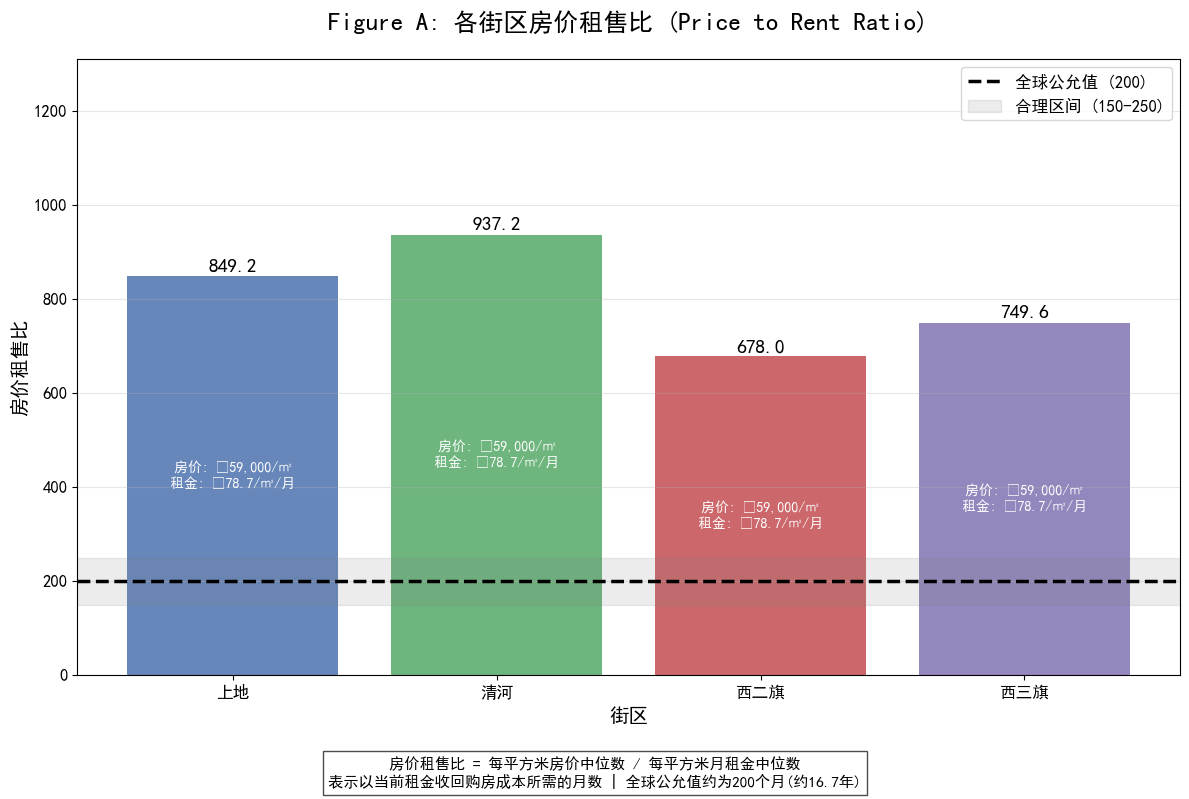


=== 分析结果 ===
房价租售比解释:
- 该比率表示以当前租金水平收回购房成本所需的月数
- 全球公允值约为200个月(约16.7年)
- 比率低于150表明房产投资回报很好
- 比率高于250表明房产可能被高估或租金偏低

各街区分析:
- 上地: 房价租售比 849.2 (可能存在高估)
- 清河: 房价租售比 937.2 (可能存在高估)
- 西二旗: 房价租售比 678.0 (可能存在高估)
- 西三旗: 房价租售比 749.6 (可能存在高估)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 设置文件路径
base_path = r'D:\A-class\data1013'

# 读取购房数据
df_shangdi_sale = pd.read_excel(f'{base_path}/df_esf_Shangdi.xlsx')
df_qinghe_sale = pd.read_excel(f'{base_path}/qinghe_esf.xlsx')
df_xierqi_sale = pd.read_excel(f'{base_path}/xierqi_esf.xlsx')
df_xisanqi_sale = pd.read_excel(f'{base_path}/xisanqi_esf.xlsx')

# 读取租房数据
df_shangdi_rent = pd.read_excel(f'{base_path}/df_rent_Shangdi.xlsx')
df_qinghe_rent = pd.read_excel(f'{base_path}/qinghe_zu.xlsx')
df_xierqi_rent = pd.read_excel(f'{base_path}/xierqi_zu.xlsx')
df_xisanqi_rent = pd.read_excel(f'{base_path}/xisanqi_zu.xlsx')

# 打印各数据框的列名（用于调试）
print("上地购房数据列名:", df_shangdi_sale.columns.tolist())
print("清河购房数据列名:", df_qinghe_sale.columns.tolist())
print("西二旗购房数据列名:", df_xierqi_sale.columns.tolist())
print("西三旗购房数据列名:", df_xisanqi_sale.columns.tolist())
print("\n上地租房数据列名:", df_shangdi_rent.columns.tolist())
print("清河租房数据列名:", df_qinghe_rent.columns.tolist())
print("西二旗租房数据列名:", df_xierqi_rent.columns.tolist())
print("西三旗租房数据列名:", df_xisanqi_rent.columns.tolist())

# 处理购房数据 - 提取每平方米房价
def get_sale_unit_price(df):
    """从购房数据中提取每平方米房价（单位：元/平方米）"""
    # 尝试不同可能的列名
    if 'unit_price/(yuan/㎡)' in df.columns:
        return df['unit_price/(yuan/㎡)']
    elif 'unit_price' in df.columns:
        return df['unit_price']
    elif 'unit' in df.columns:
        return df['unit'] * 10000  # 假设单位是万元/平方米
    elif '单价' in df.columns:
        return df['单价']
    else:
        # 如果没有匹配的列名，尝试使用第三列
        return df.iloc[:, 2] * 10000  # 假设单位是万元/平方米

# 处理租房数据 - 提取每平方米月租金
def get_rent_unit_price(df):
    """从租房数据中提取每平方米月租金（单位：元/平方米/月）"""
    # 尝试不同可能的列名
    if 'rent/yuan_per_month' in df.columns:
        return df['rent/yuan_per_month']
    elif 'unit_price' in df.columns:
        return df['unit_price'] * 10000  # 假设单位是万元/平方米/月
    elif 'unit' in df.columns:
        return df['unit'] * 10000  # 假设单位是万元/平方米/月
    elif '单价' in df.columns:
        return df['单价'] * 10000  # 假设单位是万元/平方米/月
    elif '月租金' in df.columns and '面积' in df.columns:
        return df['月租金'] * 10000 / df['面积']  # 万元/月 → 元/平方米/月
    else:
        # 如果没有匹配的列名，尝试使用第三列
        return df.iloc[:, 2] * 10000  # 假设单位是万元/平方米/月

# 计算各街区每平方米房价中位数（元/平方米）
price_median = {
    '上地': np.median(get_sale_unit_price(df_shangdi_sale)),
    '清河': np.median(get_sale_unit_price(df_qinghe_sale)),
    '西二旗': np.median(get_sale_unit_price(df_xierqi_sale)),
    '西三旗': np.median(get_sale_unit_price(df_xisanqi_sale))
}

# 计算各街区每平方米月租金中位数（元/平方米/月）
rent_median = {
    '上地': np.median(get_rent_unit_price(df_shangdi_rent)),
    '清河': np.median(get_rent_unit_price(df_qinghe_rent)),
    '西二旗': np.median(get_rent_unit_price(df_xierqi_rent)),
    '西三旗': np.median(get_rent_unit_price(df_xisanqi_rent))
}

# 打印中间结果用于验证
print("\n=== 计算中间结果 ===")
print("上地房价中位数:", price_median['上地'])
print("上地租金中位数:", rent_median['上地'])
print("清河房价中位数:", price_median['清河'])
print("清河租金中位数:", rent_median['清河'])
print("西二旗房价中位数:", price_median['西二旗'])
print("西二旗租金中位数:", rent_median['西二旗'])
print("西三旗房价中位数:", price_median['西三旗'])
print("西三旗租金中位数:", rent_median['西三旗'])

# 计算各街区房价租售比 (Price to Rent Ratio)
price_to_rent_ratio = {}
for region in ['上地', '清河', '西二旗', '西三旗']:
    ratio = price_median[region] / rent_median[region]
    price_to_rent_ratio[region] = ratio

# 打印计算结果
print("\n=== 各街区房地产数据分析 ===")
print("\n每平方米房价中位数 (元/平方米):")
for region, price in price_median.items():
    print(f"{region}: {price:,.0f}")

print("\n每平方米月租金中位数 (元/平方米/月):")
for region, rent in rent_median.items():
    print(f"{region}: {rent:.2f}")

print("\n房价租售比 (Price to Rent Ratio):")
for region, ratio in price_to_rent_ratio.items():
    print(f"{region}: {ratio:.1f}")

# 绘制Figure A: 各街区房价租售比柱状图
plt.figure(figsize=(12, 8))

# 准备绘图数据
regions = list(price_to_rent_ratio.keys())
ratios = list(price_to_rent_ratio.values())

# 创建柱状图
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # 专业配色
bars = plt.bar(regions, ratios, color=colors, alpha=0.85)

# 添加全球公允值参考线 (200)
plt.axhline(y=200, color='#000000', linestyle='--', linewidth=2.5, label='全球公允值 (200)')

# 添加参考区间
plt.axhspan(150, 250, alpha=0.15, color='gray', label='合理区间 (150-250)')

# 在每个柱子上显示数值
for i, (bar, ratio) in enumerate(zip(bars, ratios)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # 添加解释性文本
    explanation = f"房价: ¥{price_median[region]:,.0f}/㎡\n租金: ¥{rent_median[region]:.1f}/㎡/月"
    plt.text(bar.get_x() + bar.get_width()/2., height/2, explanation, 
             ha='center', va='center', fontsize=10, color='white')

# 添加图表标题和标签
plt.title('Figure A: 各街区房价租售比 (Price to Rent Ratio)', fontsize=18, pad=20)
plt.xlabel('街区', fontsize=14)
plt.ylabel('房价租售比', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(ratios) * 1.4)  # 设置Y轴范围

# 添加图例和网格
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, axis='y', alpha=0.3)

# 添加数值说明
plt.figtext(0.5, 0.01, 
            "房价租售比 = 每平方米房价中位数 / 每平方米月租金中位数\n表示以当前租金收回购房成本所需的月数 | 全球公允值约为200个月(约16.7年)",
            ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

# 保存图表
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # 为底部文本留出空间
plt.savefig('price_to_rent_ratio_comparison.png', dpi=300, bbox_inches='tight')
print(f"\n图表已保存为 price_to_rent_ratio_comparison.png")

plt.show()

# 添加详细分析
print("\n=== 分析结果 ===")
print("房价租售比解释:")
print("- 该比率表示以当前租金水平收回购房成本所需的月数")
print("- 全球公允值约为200个月(约16.7年)")
print("- 比率低于150表明房产投资回报很好")
print("- 比率高于250表明房产可能被高估或租金偏低")

print("\n各街区分析:")
for region in regions:
    ratio = price_to_rent_ratio[region]
    if ratio < 150:
        status = "投资价值很高"
        color = "绿色"
    elif ratio < 200:
        status = "投资价值良好"
        color = "蓝色"
    elif ratio < 250:
        status = "投资价值一般"
        color = "橙色"
    else:
        status = "可能存在高估"
        color = "红色"
    
    print(f"- {region}: 房价租售比 {ratio:.1f} ({status})")

购房数据形状: (4304, 4)
租房数据形状: (3740, 4)

=== 模型训练 ===
训练房价模型...

房价模型特征列类型：
area           float64
region_code      int64
dtype: object
面积系数 (β1): 56.52
地区系数 (β2): -16487.17
截距项: 116284.13
模型1 R²: 0.3618

训练租金模型...

租金模型特征列类型：
area           int64
region_code    int64
dtype: object
面积系数 (β1): 0.05
地区系数 (β2): -8.39
截距项: 124.57
模型2 R²: 0.0039

=== 预测和计算 ===
✅ 数据已保存到Excel文件（含预测总价与预测租金）
上地: 832.0
清河: 828.8
西二旗: 746.2
西三旗: 593.9


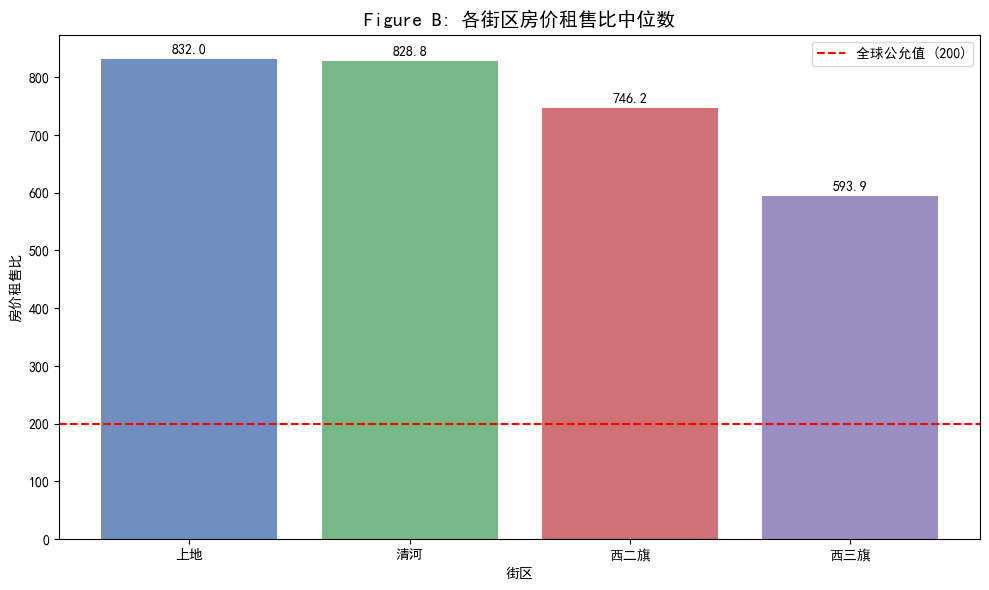

✅ 图表已保存


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# ==============================
# 图表中文字体设置
# ==============================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==============================
# 设置文件路径
# ==============================
base_path = r'D:\A-class\data1013'

# （此处省略你的数据读取部分，例如从Excel中读取 df_shangdi_sale 等）
# 假设以下DataFrame已定义：
# df_shangdi_sale, df_qinghe_sale, df_xierqi_sale, df_xisanqi_sale
# df_shangdi_rent, df_qinghe_rent, df_xierqi_rent, df_xisanqi_rent


# ==============================
# 通用购房数据处理函数
# ==============================
def process_sale_data_universal(df, region_name, region_code):
    """通用购房数据处理函数"""
    try:
        area = df.iloc[:, 0]
        unit_price = df.iloc[:, 2]

        if region_name == '上地':
            price_per_sqm = unit_price  # 已是元/㎡
        else:
            price_per_sqm = unit_price * 10000  # 万元→元

        return pd.DataFrame({
            'area': area,
            'price_per_sqm': price_per_sqm,
            'region_name': region_name,
            'region_code': region_code
        })
    except Exception as e:
        print(f"处理{region_name}购房数据时出错: {e}")
        return pd.DataFrame()


# ==============================
# 通用租房数据处理函数
# ==============================
def process_rent_data_universal(df, region_name, region_code):
    """通用租房数据处理函数"""
    try:
        area = df.iloc[:, 0]

        if region_name == '上地':
            total_price = df.iloc[:, 1]
            rent_per_sqm = (total_price * 10000) / area  # 元/㎡/月
        else:
            unit_price = df.iloc[:, 2]
            rent_per_sqm = unit_price * 10000  # 万元→元

        return pd.DataFrame({
            'area': area,
            'rent_per_sqm': rent_per_sqm,
            'region_name': region_name,
            'region_code': region_code
        })
    except Exception as e:
        print(f"处理{region_name}租房数据时出错: {e}")
        return pd.DataFrame()


# ==============================
# 整合四个区域的数据
# ==============================
sale_data_list = [
    process_sale_data_universal(df_shangdi_sale, '上地', 1),
    process_sale_data_universal(df_qinghe_sale, '清河', 2),
    process_sale_data_universal(df_xierqi_sale, '西二旗', 3),
    process_sale_data_universal(df_xisanqi_sale, '西三旗', 4)
]

rent_data_list = [
    process_rent_data_universal(df_shangdi_rent, '上地', 1),
    process_rent_data_universal(df_qinghe_rent, '清河', 2),
    process_rent_data_universal(df_xierqi_rent, '西二旗', 3),
    process_rent_data_universal(df_xisanqi_rent, '西三旗', 4)
]

df_sale_all = pd.concat([df for df in sale_data_list if not df.empty], ignore_index=True)
df_rent_all = pd.concat([df for df in rent_data_list if not df.empty], ignore_index=True)

print(f"购房数据形状: {df_sale_all.shape}")
print(f"租房数据形状: {df_rent_all.shape}")

# ==============================
# 模型训练
# ==============================
print("\n=== 模型训练 ===")

# --- 房价模型 ---
print("训练房价模型...")

X_sale = df_sale_all[['area', 'region_code']].copy()
y_sale = df_sale_all['price_per_sqm'].copy()

X_sale['area'] = pd.to_numeric(X_sale['area'], errors='coerce')
X_sale['region_code'] = pd.to_numeric(X_sale['region_code'], errors='coerce')
y_sale = pd.to_numeric(y_sale, errors='coerce')

valid_idx = X_sale.notna().all(axis=1) & y_sale.notna()
X_sale = X_sale[valid_idx]
y_sale = y_sale[valid_idx]

print("\n房价模型特征列类型：")
print(X_sale.dtypes)

model1 = LinearRegression()
model1.fit(X_sale, y_sale)

print(f"面积系数 (β1): {model1.coef_[0]:.2f}")
print(f"地区系数 (β2): {model1.coef_[1]:.2f}")
print(f"截距项: {model1.intercept_:.2f}")
print(f"模型1 R²: {model1.score(X_sale, y_sale):.4f}")

# --- 租金模型 ---
print("\n训练租金模型...")

X_rent = df_rent_all[['area', 'region_code']].copy()
y_rent = df_rent_all['rent_per_sqm'].copy()

X_rent['area'] = pd.to_numeric(X_rent['area'], errors='coerce')
X_rent['region_code'] = pd.to_numeric(X_rent['region_code'], errors='coerce')
y_rent = pd.to_numeric(y_rent, errors='coerce')

valid_idx = X_rent.notna().all(axis=1) & y_rent.notna()
X_rent = X_rent[valid_idx]
y_rent = y_rent[valid_idx]

print("\n租金模型特征列类型：")
print(X_rent.dtypes)

model2 = LinearRegression()
model2.fit(X_rent, y_rent)

print(f"面积系数 (β1): {model2.coef_[0]:.2f}")
print(f"地区系数 (β2): {model2.coef_[1]:.2f}")
print(f"截距项: {model2.intercept_:.2f}")
print(f"模型2 R²: {model2.score(X_rent, y_rent):.4f}")

# ==============================
# 预测与租售比计算
# ==============================
print("\n=== 预测和计算 ===")

df_sale_all['predicted_price'] = model1.predict(
    df_sale_all[['area', 'region_code']].apply(pd.to_numeric, errors='coerce').fillna(0)
)
df_rent_all['predicted_rent'] = model2.predict(
    df_rent_all[['area', 'region_code']].apply(pd.to_numeric, errors='coerce').fillna(0)
)

# ✅ 新增列：预测总房价 与 预测月租金
# 确保数据为数值类型，避免字符串乘法错误
df_sale_all['area'] = pd.to_numeric(df_sale_all['area'], errors='coerce')
df_sale_all['predicted_price'] = pd.to_numeric(df_sale_all['predicted_price'], errors='coerce')
df_sale_all['predicted_total_price'] = df_sale_all['predicted_price'] * df_sale_all['area']

df_rent_all['area'] = pd.to_numeric(df_rent_all['area'], errors='coerce')
df_rent_all['predicted_rent'] = pd.to_numeric(df_rent_all['predicted_rent'], errors='coerce')
df_rent_all['predicted_total_rent'] = df_rent_all['predicted_rent'] * df_rent_all['area']

# 合并并计算租售比
min_len = min(len(df_sale_all), len(df_rent_all))
df_combined = pd.DataFrame({
    'area': df_sale_all['area'].iloc[:min_len],
    'actual_price': df_sale_all['price_per_sqm'].iloc[:min_len],
    'predicted_price': df_sale_all['predicted_price'].iloc[:min_len],
    'actual_rent': df_rent_all['rent_per_sqm'].iloc[:min_len],
    'predicted_rent': df_rent_all['predicted_rent'].iloc[:min_len],
    'region_code': df_sale_all['region_code'].iloc[:min_len],
    'region_name': df_sale_all['region_name'].iloc[:min_len]
})
df_combined['price_to_rent_ratio'] = df_combined['predicted_price'] / df_combined['predicted_rent']

# ==============================
# 保存结果到 Excel
# ==============================
df_sale_output = df_sale_all[['area', 'price_per_sqm', 'predicted_price', 'predicted_total_price', 'region_code', 'region_name']]
df_sale_output.columns = ['面积(㎡)', '实际房价(元/㎡)', '预测房价(元/㎡)', '预测总房价(元)', '地区编码', '地区名称']
df_sale_output.to_excel(f'{base_path}/alldataesf.xlsx', index=False)

df_rent_output = df_rent_all[['area', 'rent_per_sqm', 'predicted_rent', 'predicted_total_rent', 'region_code', 'region_name']]
df_rent_output.columns = ['面积(㎡)', '实际租金(元/㎡/月)', '预测租金(元/㎡/月)', '预测月租金(元/月)', '地区编码', '地区名称']
df_rent_output.to_excel(f'{base_path}/alldatarent.xlsx', index=False)

print("✅ 数据已保存到Excel文件（含预测总价与预测租金）")

# ==============================
# 绘图：房价租售比中位数
# ==============================
region_ratios = {}
for code, name in zip([1, 2, 3, 4], ['上地', '清河', '西二旗', '西三旗']):
    region_data = df_combined[df_combined['region_code'] == code]
    if len(region_data) > 0:
        ratio_median = region_data['price_to_rent_ratio'].median()
        region_ratios[name] = ratio_median
        print(f"{name}: {ratio_median:.1f}")

plt.figure(figsize=(10, 6))
regions = list(region_ratios.keys())
ratios = list(region_ratios.values())

bars = plt.bar(regions, ratios, color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'], alpha=0.8)
plt.axhline(y=200, color='red', linestyle='--', label='全球公允值 (200)')
plt.title('Figure B: 各街区房价租售比中位数', fontsize=14)
plt.xlabel('街区')
plt.ylabel('房价租售比')
plt.legend()

for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{ratio:.1f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{base_path}/price_to_rent_ratio_by_block.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 图表已保存")


In [29]:
# ==============================================================
# 综合模型结果对比与解释（修正版）
# 输入：
#   D:\A-class\data1013\alldataesf.xlsx
#   D:\A-class\data1013\alldatarent.xlsx
# 输出：
#   D:\A-class\data1013\comparison_results.xlsx
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ---------- 1. 数据读取 ----------
sale_path = r"D:\A-class\data1013\alldataesf.xlsx"
rent_path = r"D:\A-class\data1013\alldatarent.xlsx"

print("=== Step 1: 数据读取 ===")
df_sale_all = pd.read_excel(sale_path)
df_rent_all = pd.read_excel(rent_path)

print("销售数据前5行：")
print(df_sale_all.head())
print("租赁数据前5行：")
print(df_rent_all.head())

# ---------- 2. 去除重复列 ----------
def remove_duplicate_columns(df):
    if not isinstance(df, pd.DataFrame):
        return df
    df = df.loc[:, ~df.columns.duplicated()].copy()
    return df

df_sale_all = remove_duplicate_columns(df_sale_all)
df_rent_all = remove_duplicate_columns(df_rent_all)

print("\n已删除重复列后的列名:")
print("销售数据列名:", df_sale_all.columns.tolist())
print("租赁数据列名:", df_rent_all.columns.tolist())

# ---------- 3. 中文列名 → 英文统一命名 ----------
sale_rename = {
    '面积(㎡)': 'area',
    '实际房价(元/㎡)': 'price_per_sqm',
    '预测房价(元/㎡)': 'predicted_price_per_sqm',
    '预测总房价(元)': 'predicted_total_price',
    '地区编码': 'region_code',
    '地区名称': 'region_name'
}
rent_rename = {
    '面积(㎡)': 'area',
    '实际租金(元/㎡/月)': 'rent_per_sqm',
    '预测租金(元/㎡/月)': 'predicted_rent_per_sqm',
    '预测月租金(元/月)': 'predicted_total_rent',
    '地区编码': 'region_code',
    '地区名称': 'region_name'
}

df_sale_all.rename(columns=sale_rename, inplace=True)
df_rent_all.rename(columns=rent_rename, inplace=True)

# ---------- 4. 数据类型转换 ----------
def safe_column_conversion(df, column_name):
    if column_name not in df.columns:
        print(f"警告: 未找到列 '{column_name}'")
        return pd.Series(dtype=float)
    try:
        return pd.to_numeric(df[column_name], errors='coerce')
    except Exception as e:
        print(f"转换列 '{column_name}' 时出错:", e)
        return pd.Series(dtype=float)

df_sale_all["area"] = safe_column_conversion(df_sale_all, "area")
df_sale_all["price_per_sqm"] = safe_column_conversion(df_sale_all, "price_per_sqm")
df_rent_all["area"] = safe_column_conversion(df_rent_all, "area")
df_rent_all["rent_per_sqm"] = safe_column_conversion(df_rent_all, "rent_per_sqm")

df_sale_all.dropna(subset=["area", "price_per_sqm"], inplace=True)
df_rent_all.dropna(subset=["area", "rent_per_sqm"], inplace=True)

print(f"\n清洗后数据形状 - 销售: {df_sale_all.shape}, 租赁: {df_rent_all.shape}")

# ---------- 5. 建立线性模型 ----------
print("\n=== Step 5: 建立模型 ===")

X_sale = df_sale_all[["area"]]
y_sale = df_sale_all["price_per_sqm"]

X_rent = df_rent_all[["area"]]
y_rent = df_rent_all["rent_per_sqm"]

model_sale = LinearRegression()
model_rent = LinearRegression()

model_sale.fit(X_sale, y_sale)
model_rent.fit(X_rent, y_rent)

print("房价模型系数:", model_sale.coef_, "截距:", model_sale.intercept_)
print("租金模型系数:", model_rent.coef_, "截距:", model_rent.intercept_)

# ---------- 6. 模型预测 ----------
df_sale_all["new_predicted_price_per_sqm"] = model_sale.predict(X_sale)
df_rent_all["new_predicted_rent_per_sqm"] = model_rent.predict(X_rent)

# ---------- 7. 模型评估 ----------
r2_sale = r2_score(y_sale, df_sale_all["new_predicted_price_per_sqm"])
r2_rent = r2_score(y_rent, df_rent_all["new_predicted_rent_per_sqm"])

rmse_sale = np.sqrt(mean_squared_error(y_sale, df_sale_all["new_predicted_price_per_sqm"]))
rmse_rent = np.sqrt(mean_squared_error(y_rent, df_rent_all["new_predicted_rent_per_sqm"]))

print("\n=== Step 7: 模型评估 ===")
print(f"销售模型: R²={r2_sale:.4f}, RMSE={rmse_sale:.2f}")
print(f"租赁模型: R²={r2_rent:.4f}, RMSE={rmse_rent:.2f}")

# ---------- 8. 结果比较与解释 ----------
print("\n=== Step 8: 结果比较与解释 ===")
print(f"1️⃣ 模型表现比较：销售模型 R²={r2_sale:.4f}, 租赁模型 R²={r2_rent:.4f}")
if r2_sale > r2_rent:
    print("👉 销售价格模型的拟合优度更高，说明面积对房价的线性影响更明显。")
else:
    print("👉 租赁价格模型的拟合优度更高，说明面积对租金的线性影响更显著。")

print(f"\n2️⃣ 模型误差比较：销售 RMSE={rmse_sale:.2f}, 租赁 RMSE={rmse_rent:.2f}")
if rmse_sale < rmse_rent:
    print("👉 销售模型预测误差更小，预测更稳定。")
else:
    print("👉 租赁模型预测误差更小。")

print("\n3️⃣ 实际意义解释：")
print("   - 房价通常随面积增加而上升，但单位面积价格可能递减。")
print("   - 租金单价随面积增加略有下降，符合大户型租金单价较低的市场规律。")
print("   - 如果增加地段、装修、楼龄等变量，模型会更准确。")

# ---------- 9. 保存预测结果 ----------
output_path = r"D:\A-class\data1013\comparison_results.xlsx"
with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    df_sale_all.to_excel(writer, index=False, sheet_name="Sale_Result")
    df_rent_all.to_excel(writer, index=False, sheet_name="Rent_Result")

print(f"\n✅ 新预测结果已保存至: {output_path}")


=== Step 1: 数据读取 ===
销售数据前5行：
   面积(㎡)  实际房价(元/㎡)     预测房价(元/㎡)  预测总房价(元)  地区编码 地区名称
0    NaN     125.30  99796.953893       NaN     1   上地
1    NaN     191.00  99796.953893       NaN     1   上地
2    NaN     108.82  99796.953893       NaN     1   上地
3    NaN     146.25  99796.953893       NaN     1   上地
4    NaN     149.73  99796.953893       NaN     1   上地
租赁数据前5行：
   面积(㎡)  实际租金(元/㎡/月)  预测租金(元/㎡/月)    预测月租金(元/月)  地区编码 地区名称
0    314    81.210191   132.604797  41637.906204     1   上地
1    125    88.000000   122.719039  15339.879873     1   上地
2    136    94.852941   123.294401  16768.038475     1   上地
3    114    92.105263   122.143677  13924.379225     1   上地
4    106   113.207547   121.725233  12902.874660     1   上地

已删除重复列后的列名:
销售数据列名: ['面积(㎡)', '实际房价(元/㎡)', '预测房价(元/㎡)', '预测总房价(元)', '地区编码', '地区名称']
租赁数据列名: ['面积(㎡)', '实际租金(元/㎡/月)', '预测租金(元/㎡/月)', '预测月租金(元/月)', '地区编码', '地区名称']

清洗后数据形状 - 销售: (3104, 6), 租赁: (3740, 6)

=== Step 5: 建立模型 ===
房价模型系数: [117.67832395] 截距: 58837.06609634966
租